# TASK 4: TIME SERIES ANALYSIS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
import seaborn as sn

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_final= pd.read_csv('/content/drive/MyDrive/final_datasetV5_dropped.csv')

In [ ]:
df_final['date'] = pd.to_datetime(df_final[['year', 'month', 'day']])

In [ ]:
df_final['is_killed'] = df_final['n_killed'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_final.sort_values(by=['city_or_county','year','month','day']).head(100)

year  month  day           state   city_or_county  \
93311   2014      1   13       LOUISIANA        Abbeville   
92626   2014      6   23       LOUISIANA        Abbeville   
93173   2014      9   14       LOUISIANA        Abbeville   
92901   2014     11   25       LOUISIANA        Abbeville   
92926   2014     12    8       LOUISIANA        Abbeville   
93679   2015      1   10       LOUISIANA        Abbeville   
94052   2015      2    6       LOUISIANA        Abbeville   
95983   2016      2   21       LOUISIANA        Abbeville   
1875    2016      2   25         ALABAMA        Abbeville   
186965  2016      8    4  SOUTH CAROLINA        Abbeville   
96276   2016     12   23       LOUISIANA        Abbeville   
188174  2017      2   23  SOUTH CAROLINA        Abbeville   
98364   2017      4    2       LOUISIANA        Abbeville   
98439   2017      4   21       LOUISIANA        Abbeville   
188617  2017      5   28  SOUTH CAROLINA        Abbeville   
3808    2017      6    2         ALABAMA        Abbeville   
188017  2017      8   24  SOUTH CAROLINA        Abbeville   
188647  2017      9   30  SOUTH CAROLINA        Abbeville   
57623   2017     10   24         GEORGIA        Abbeville   
98263   2017     11   18       LOUISIANA        Abbeville   
96801   2017     12    2       LOUISIANA        Abbeville   
188334  2017     12    5  SOUTH CAROLINA        Abbeville   
97428   2017     12   20       LOUISIANA        Abbeville   
98682   2018      2    7       LOUISIANA        Abbeville   
98615   2018      3   14       LOUISIANA        Abbeville   
99139   2019      1   23       LOUISIANA        Abbeville   
98798   2019      2   23       LOUISIANA        Abbeville   
189226  2019      6   17  SOUTH CAROLINA        Abbeville   
98953   2019      8    7       LOUISIANA        Abbeville   
98946   2019      8    9       LOUISIANA        Abbeville   
98884   2019      9    9       LOUISIANA        Abbeville   
99398   2020      1   17       LOUISIANA        Abbeville   
99477   2020      5   26       LOUISIANA        Abbeville   
99586   2020      7   25       LOUISIANA        Abbeville   
223903  2015      7   24       WISCONSIN       Abbotsford   
226333  2018      1   20       WISCONSIN       Abbotsford   
206896  2017      7   28           TEXAS           Abbott   
181810  2019      8    3    PENNSYLVANIA  Abbott Township   
180505  2017      4    8    PENNSYLVANIA      Abbottstown   
158428  2016     10   16    NORTH DAKOTA      Abercrombie   
119365  2014      1   14     MISSISSIPPI         Aberdeen   
189796  2014      3   18    SOUTH DAKOTA         Aberdeen   
100757  2014      3   21        MARYLAND         Aberdeen   
119178  2014      5   10     MISSISSIPPI         Aberdeen   
119488  2014      7   20     MISSISSIPPI         Aberdeen   
100837  2014      8    7        MARYLAND         Aberdeen   
119392  2014     10    3     MISSISSIPPI         Aberdeen   
189876  2015      2   21    SOUTH DAKOTA         Aberdeen   
120005  2015      3   19     MISSISSIPPI         Aberdeen   
101690  2015      3   21        MARYLAND         Aberdeen   
119678  2015      4    6     MISSISSIPPI         Aberdeen   
101999  2015      4    7        MARYLAND         Aberdeen   
101400  2015      4   10        MARYLAND         Aberdeen   
218661  2015      5   22      WASHINGTON         Aberdeen   
101984  2015      6   26        MARYLAND         Aberdeen   
189847  2015      8   15    SOUTH DAKOTA         Aberdeen   
218587  2015     10   24      WASHINGTON         Aberdeen   
218163  2015     10   25      WASHINGTON         Aberdeen   
101398  2015     12    4        MARYLAND         Aberdeen   
101208  2015     12   10        MARYLAND         Aberdeen   
119729  2015     12   13     MISSISSIPPI         Aberdeen   
120573  2016      1   13     MISSISSIPPI         Aberdeen   
190022  2016      2   11    SOUTH DAKOTA         Aberdeen   
120334  2016      2   22     MISSISSIPPI         Aberdeen   
103238  2016      2   27        MARYLAND   

Here we create our time series considering  only incidents that happened in the years [2014,2015, 2016, 2017]. The time series has been extracted for each city, computing for each week of the 4 years a score.
Each value of the time series corresponds to the score value for a certain week of 2014, 2015,2016, 2017. We filtered the cities, excluding the ones with a low number of weeks with incidents considering only cities with a number of weeks with incidents greater than 15% of the total number of the weeks of the years.

In [ ]:
selected_years = [2014, 2015, 2016, 2017]
filtered_df = df_final[df_final['year'].isin(selected_years)]

# Assuming df_final is your original DataFrame
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df['week'] = filtered_df['date'].dt.week

# Calculate the score for each incident
filtered_df['score'] = (filtered_df['n_injured'] + filtered_df['n_arrested']) / filtered_df['n_participants']

# Group by year, city_or_county, and week, then calculate the sum of the scores
grouped_df = filtered_df.groupby(['year', 'city_or_county', 'week']).agg({'score': 'sum','is_killed': 'max'}).reset_index()
grouped_df['week'] = grouped_df['week'].apply(lambda x: f'{x:02d}')
grouped_df['year_week'] = grouped_df['year'].astype(str) + '_' + grouped_df['week'].astype(str)

# Pivot the table to have cities as rows and weeks as columns
pivot_df = grouped_df.pivot_table(index='city_or_county', columns='year_week', values=['score','is_killed'], fill_value=0)

threshold = 0.15 * len(pivot_df.columns)

time_series = pivot_df[pivot_df.apply(lambda row: (row > 0).sum() > threshold, axis=1)]

ts_score = time_series['score']

time_series['is_killed'] = time_series['is_killed'].replace(-1, 0)

ts_killed = time_series['is_killed']


<ipython-input-388-6a5f48f0eabf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])
<ipython-input-388-6a5f48f0eabf>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  filtered_df['week'] = filtered_df['date'].dt.week
<ipython-input-388-6a5f48f0eabf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['week'] = filtered_df['date'].dt.week
<ipython-input-388-6a5f48f

In [ ]:
#time_series = time_series.transpose()
ts_score = ts_score.transpose()
ts_killed = ts_killed.transpose()

In [ ]:
time_series.head(100)

is_killed                                                  \
year_week             2014_01 2014_02 2014_03 2014_04 2014_05 2014_06 2014_07   
city_or_county                                                                  
Abilene                     0       0       0       0       0       0       0   
Aiken                       0       0       0       0       0       0       0   
Akron                       0       0       0       1       0       0       0   
Albany                      0       0       0       0       0       0       1   
Albuquerque                 0       0       0       1       0       0       0   
Alexandria                  0       0       0       0       0       1       0   
Allentown                   0       0       1       0       0       0       0   
Amarillo                    0       0       0       0       0       0       0   
Anchorage                   0       1       1       1       0       0       0   
Anderson                    0       0       0       0       0       0       0   
Annapolis                   0       0       0       0       0       0       0   
Anniston                    0       1       0       0       0       0       0   
Antioch                     0       0       0       0       0       1       0   
Arlington                   0       0       1       0       0       0       0   
Asheville                   0       0       1       0       0       0       0   
Athens                      0       0       0       0       1       0       0   
Atlanta                     0       1       0       1       1       0       0   
Atlantic City               0       1       1       0       0       0       0   
Auburn                      0       0       0       0       0       0       1   
Augusta                     0       0       0       1       0       1       0   
Aurora                      0       0       1       0       0       0       0   
Austin                      1       0       1       0       1       0       0   
Bakersfield                 1       0       0       0       0       0       0   
Baltimore                   1       1       1       1       1       0       0   
Baton Rouge                 0       0       1       0       1       1       1   
Battle Creek                0       0       0       0       0       0       0   
Beaufort                    0       0       1       1       0       0       0   
Beaumont                    0       0       0       1       0       0       0   
Beloit                      0       0       0       0       0       0       0   
Bessemer                    0       0       0       0       0       0       0   
Billings                    0       0       0       0       0       0       0   
Birmingham                  1       0       0       1       0       1       0   
Bloomington                 0       0       0       0       0       0       1   
Blytheville                 0       0       0       0       0       0       0   
Boise                       0       0       0       0       0       0       0   
Boston                      0       1       0       1       0       1       0   
Bowling Green               0       0       0       0       0       0       0   
Boynton Beach               0       0       0       0       0       0       0   
Bradenton                   0       0       0       0       1       0       0   
Bridgeport                  0       0       0       0       0       0       0   
Brockton                    0       0       0       0       0       0       0   
Bronx                       1       1       1       1       1       1       0   
Brooklyn                    1       0       1       0       1       1       0   
Buffalo                     1       0       0       0       0       0       0   
Burlington                  0       0       0       0       0       0       0   
Camden                      1       0       0       0       0       1       1   
Canton                      0       0       0      

Plot the severity score three cities

<Axes: xlabel='year_week'>

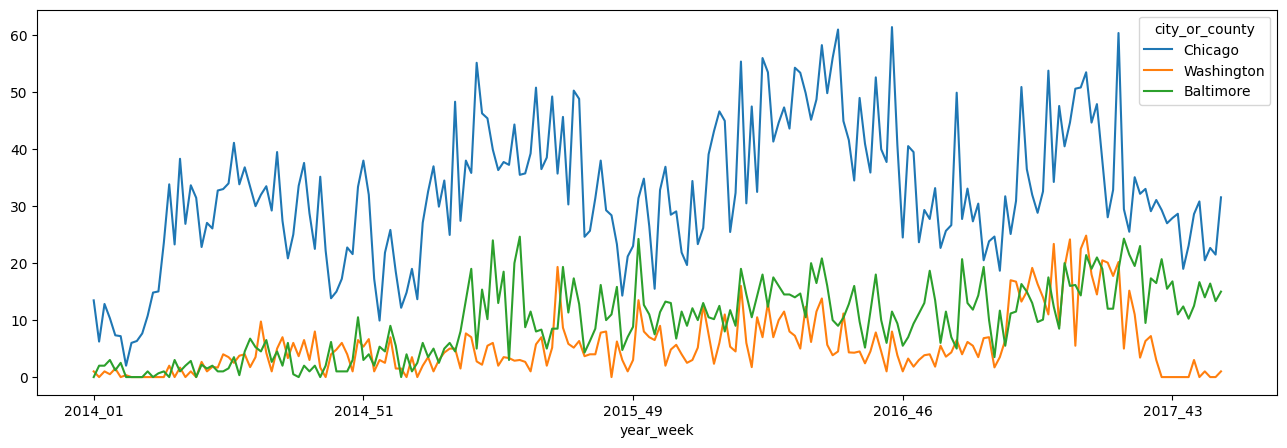

In [ ]:
ts_score[["Chicago", "Washington", "Baltimore"]].plot(figsize=(16, 5))


Plot the average score for each year.



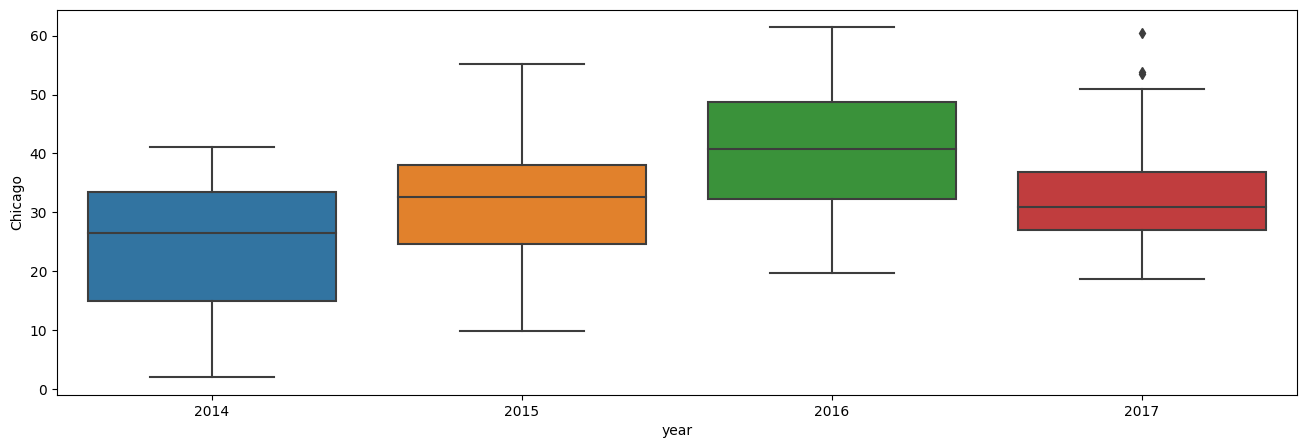

In [ ]:
ts_score_reset = ts_score.reset_index()

# Extract 'year' from 'year_week'
ts_score_reset['year'] = ts_score_reset['year_week'].str.split('_').str[0].astype(int)

plt.figure(figsize=(16, 5))
sn.boxplot(data=ts_score_reset, x='year', y="Chicago")
plt.show()

In [ ]:
pip install --upgrade tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
#from tslearn.metrics.dtw_variants import pairwise_distances
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

Method for the k-means analysis to find the best k value.



In [ ]:
def k_means(x_cluster, i_cluster, max_k):
    sse_list = list()
    sil_list = list()
    davies_list = list()
    for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Dataframe {0}, iterating over {1} possible K values".format(i_cluster, max_k)):
        kmeans_iter = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=max_k, random_state=0)
        kmeans_iter.fit(x_cluster)

        davies_list.append(davies_bouldin_score(x_cluster, kmeans_iter.labels_))
        sil_list.append(silhouette_score(x_cluster, kmeans_iter.labels_))
        sse = kmeans_iter.inertia_
        sse_list.append(sse)

    return sse_list, sil_list, davies_list

Method to plot the SSE, Silhouette and Davies-Bouldin scores.



In [ ]:
def plot_indicators(i_cluster, max_k, sse_list, sil_list, davies_list):

    # plot indicators
    fig, axs = plt.subplots(3, 1, figsize=(10, 14));
    label_s = 10

    # SSE
    axs[0].plot(range(2, len(sse_list) + 2), sse_list)
    axs[0].set_ylabel('SSE', fontsize=16)
    axs[0].set_xlabel('K', fontsize=16)
    axs[0].tick_params(axis='both', which='major', labelsize=label_s)
    axs[0].set_xticks(range(2, max_k+1));

    # Silhouette
    axs[1].plot(range(2, len(sil_list) + 2), sil_list)
    axs[1].set_ylabel('Silhouette Score', fontsize=16)
    axs[1].set_xlabel('K', fontsize=16)
    axs[1].tick_params(axis='both', which='major', labelsize=label_s)
    axs[1].set_xticks(range(2,max_k+1));

    # Davies-Bouldin Score
    axs[2].plot(range(2, len(davies_list) + 2), davies_list)
    axs[2].set_ylabel('Davies-Bouldin Score', fontsize=16)
    axs[2].set_xlabel('K', fontsize=16)
    axs[2].tick_params(axis='both', which='major', labelsize=label_s)
    axs[2].set_xticks(range(2,max_k+1));

    axs[0].set_title("Dataframe {0}, indicators".format(i_cluster), fontsize=22)

**SHAPE BASED CLUSTERING**

In [ ]:
ts_score2 = ts_score.transpose()

In [ ]:
sse, sil, davies_bouldin = k_means(ts_score2, "City", 20)


Dataframe City, iterating over 20 possible K values:   0%|          | 0/19 [00:00<?, ?it/s]

Plot the results of the analysis (SSE, Silhouette and Davies-Bouldin scores) for each value of k.



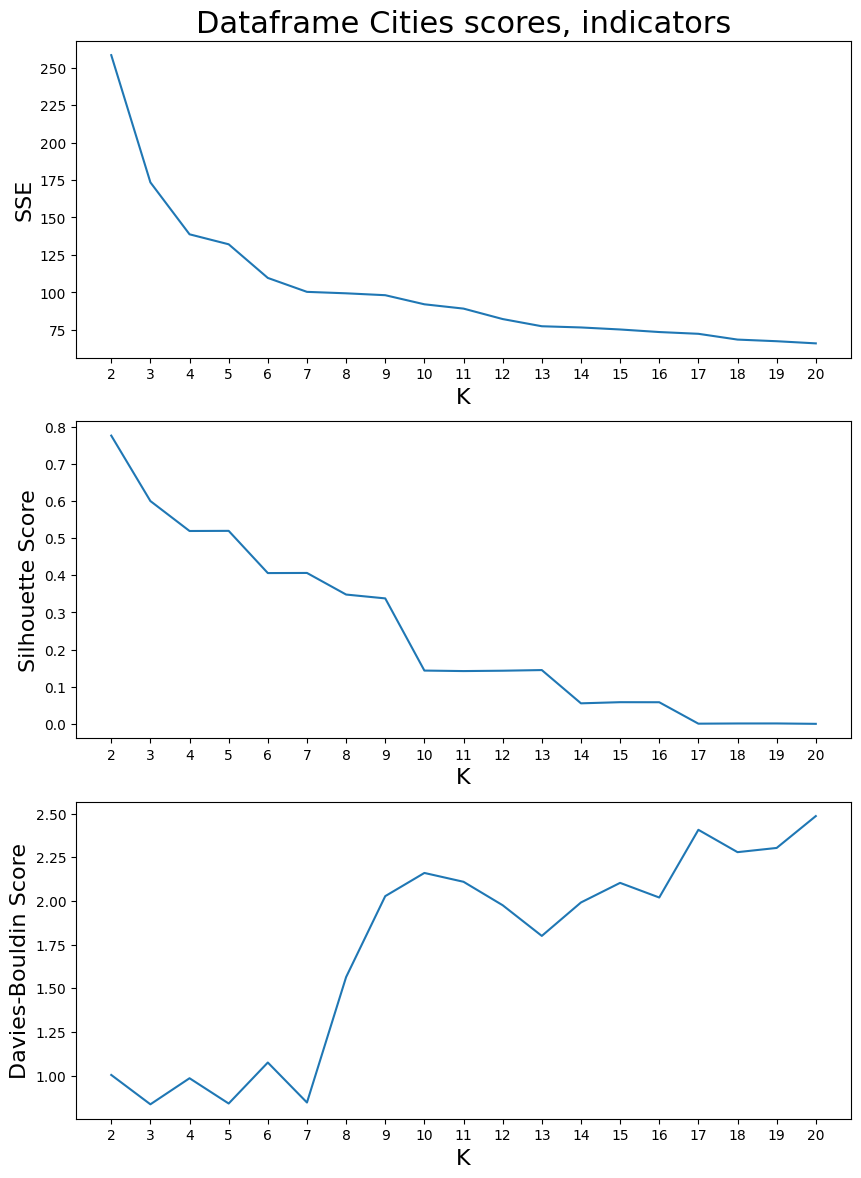

In [ ]:
plot_indicators("Cities scores", 20, sse, sil, davies_bouldin)


By using the elbow rule for the SSE graph and looking at the other two, we saw that the best value for k is 5.



In [ ]:
k = 4  # best k value
kmeans = TimeSeriesKMeans(n_clusters=k, metric="dtw")
kmeans.fit(ts_score2)
print("SSE:", sse[k-2], " - SILHOUETTE:", sil[k-2])

SSE: 138.76058805196752  - SILHOUETTE: 0.5192732671532451


Let's see how many cities are in each cluster.



In [ ]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
clust_dict = dict(zip(bins, hist))
print(clust_dict)


{0: 69, 1: 1, 2: 243, 3: 12}


Plot the clusters.



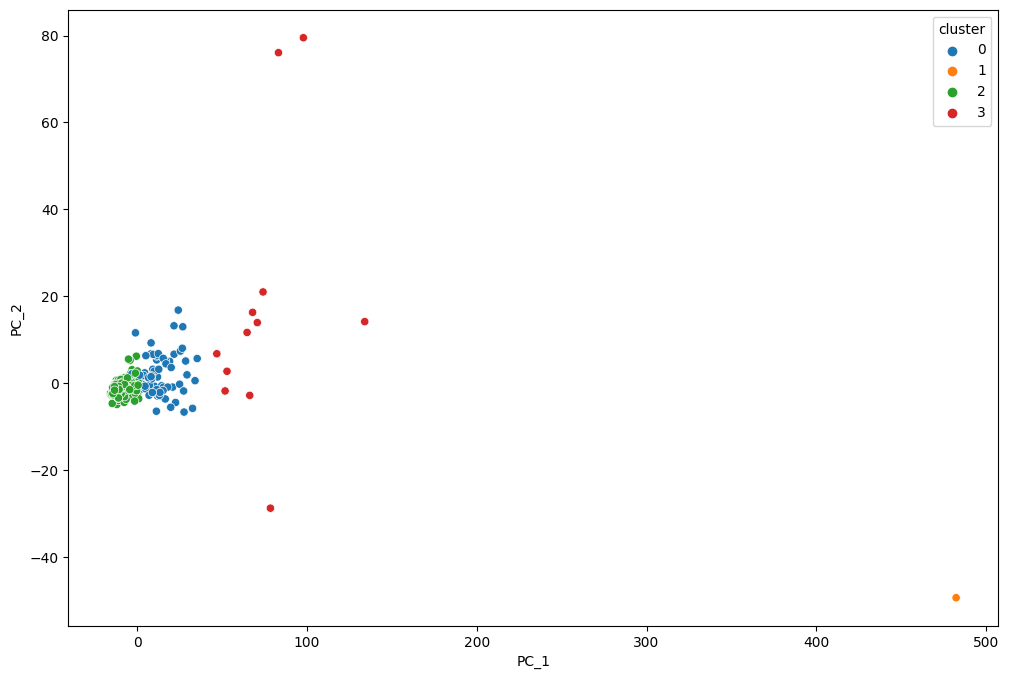

In [ ]:
pca = PCA(n_components=2)
scaler = TimeSeriesScalerMeanVariance()
df_pca = ts_score2.copy()
df_pca.columns = df_pca.columns.astype(str)
df_pca_scaled = scaler.fit_transform(df_pca)
data_to_visualize = pd.DataFrame(pca.fit_transform(df_pca), columns=['PC_1','PC_2'], index=ts_score2.index)
data_to_visualize['cluster'] = pd.Categorical(kmeans.labels_)
plt.figure(figsize=(12,8))
sn.scatterplot(x="PC_1",y="PC_2", hue="cluster", data=data_to_visualize);


In [ ]:
cluster_type = list()
cluster_colors = ["blue", "green", "orange", "red"]#, "brown", "black" ,"purple"]
cluster_name = ["C1", "C2", "C3", "C4"]#, "C5", "C6", "C7"]
for cluster in kmeans.cluster_centers_:
    cluster_type.append(cluster.mean())

cluster_type = pd.DataFrame(cluster_type, columns=["mean"])
cluster_type.sort_values("mean", inplace=True)
cluster_type["color"] = cluster_colors
cluster_type["name"] = cluster_name
cluster_type

mean   color name
2   0.458257    blue   C1
0   1.627717   green   C2
3   3.921307  orange   C3
1  32.488747     red   C4

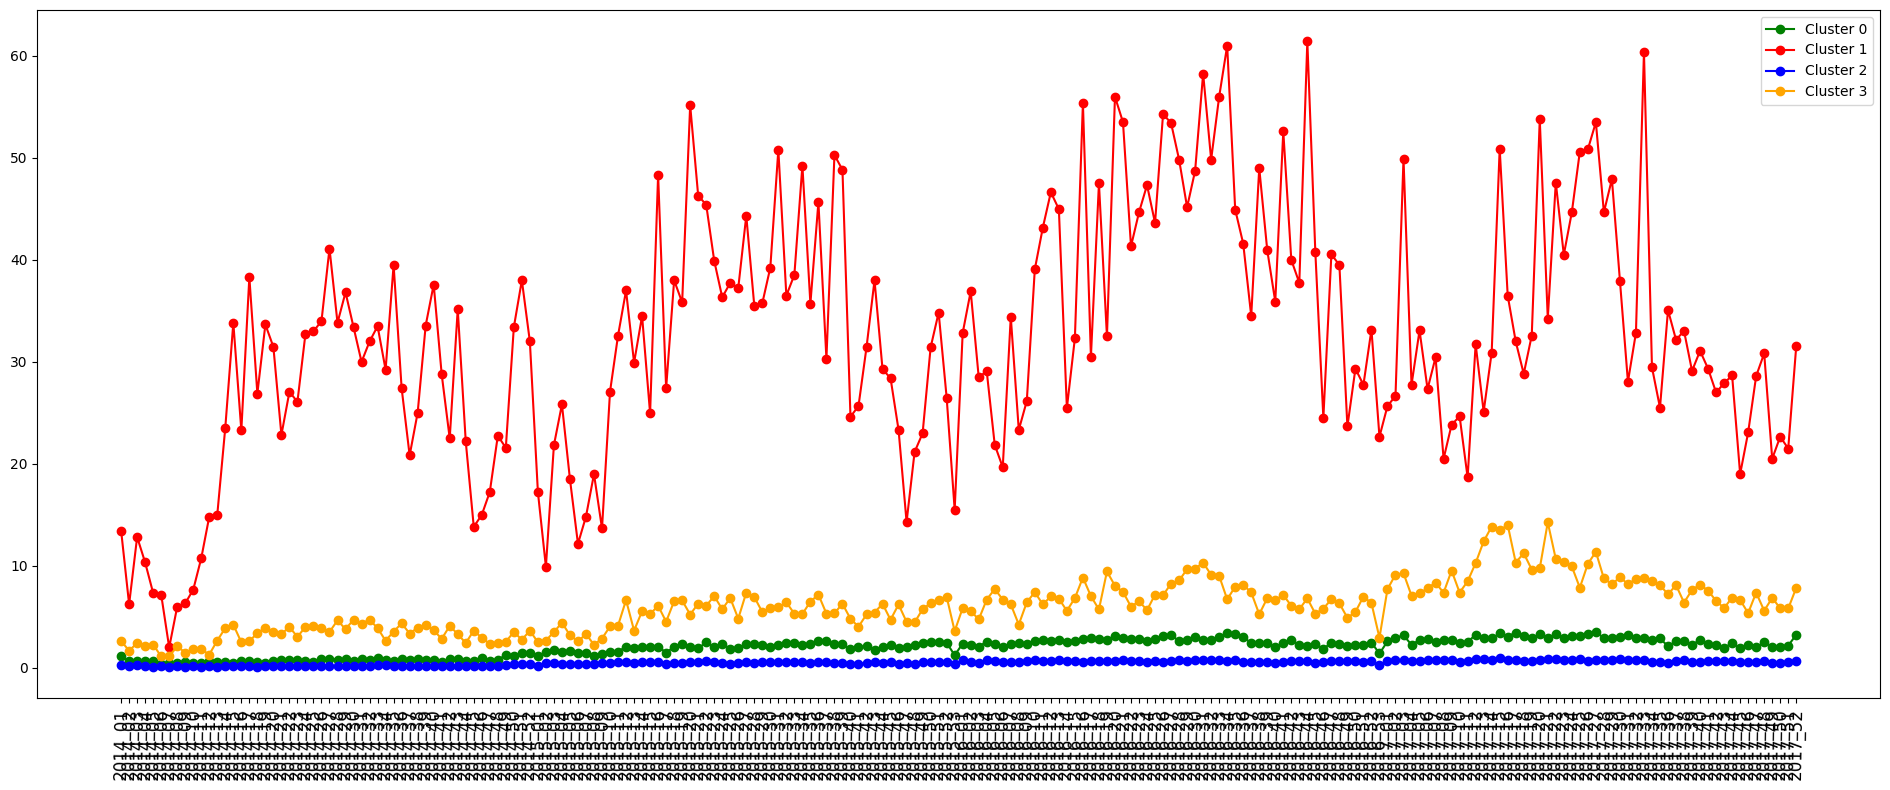

In [ ]:
def plot_basic_statistics(df, labels, columns):
    df_plot = pd.DataFrame(df, columns=columns, copy=True)
    df_plot['cluster'] = labels
    means = []
    std = []
    label_s = 12
    fig = plt.figure(figsize=(19, 8))
    for i in np.unique(df_plot['cluster'].array):
        # Filter columns based on the 'year_week' values in the 'columns' list
        clust = df_plot.loc[df_plot['cluster'] == i, df_plot.columns[df_plot.columns.isin(columns)]]
        means.append(clust.describe().loc['mean'].values)
        std.append(clust.describe().loc['std'].values)
    legend = []
    for i in np.unique(df_plot['cluster'].array):
        cluster_color = cluster_type.loc[i, "color"]
        plt.plot(range(0, len(columns)), means[i], marker='o', color=cluster_color)
        legend.append('Cluster %d' % i)
    plt.legend(legend)
    plt.xticks(range(0, len(columns)), columns, fontsize=label_s, rotation=89)
    plt.tight_layout()

clusters_cities = kmeans.labels_

# Assuming ts_score2 is the DataFrame to be plotted
plot_basic_statistics(ts_score2, clusters_cities, ts_score2.columns.unique('year_week'))

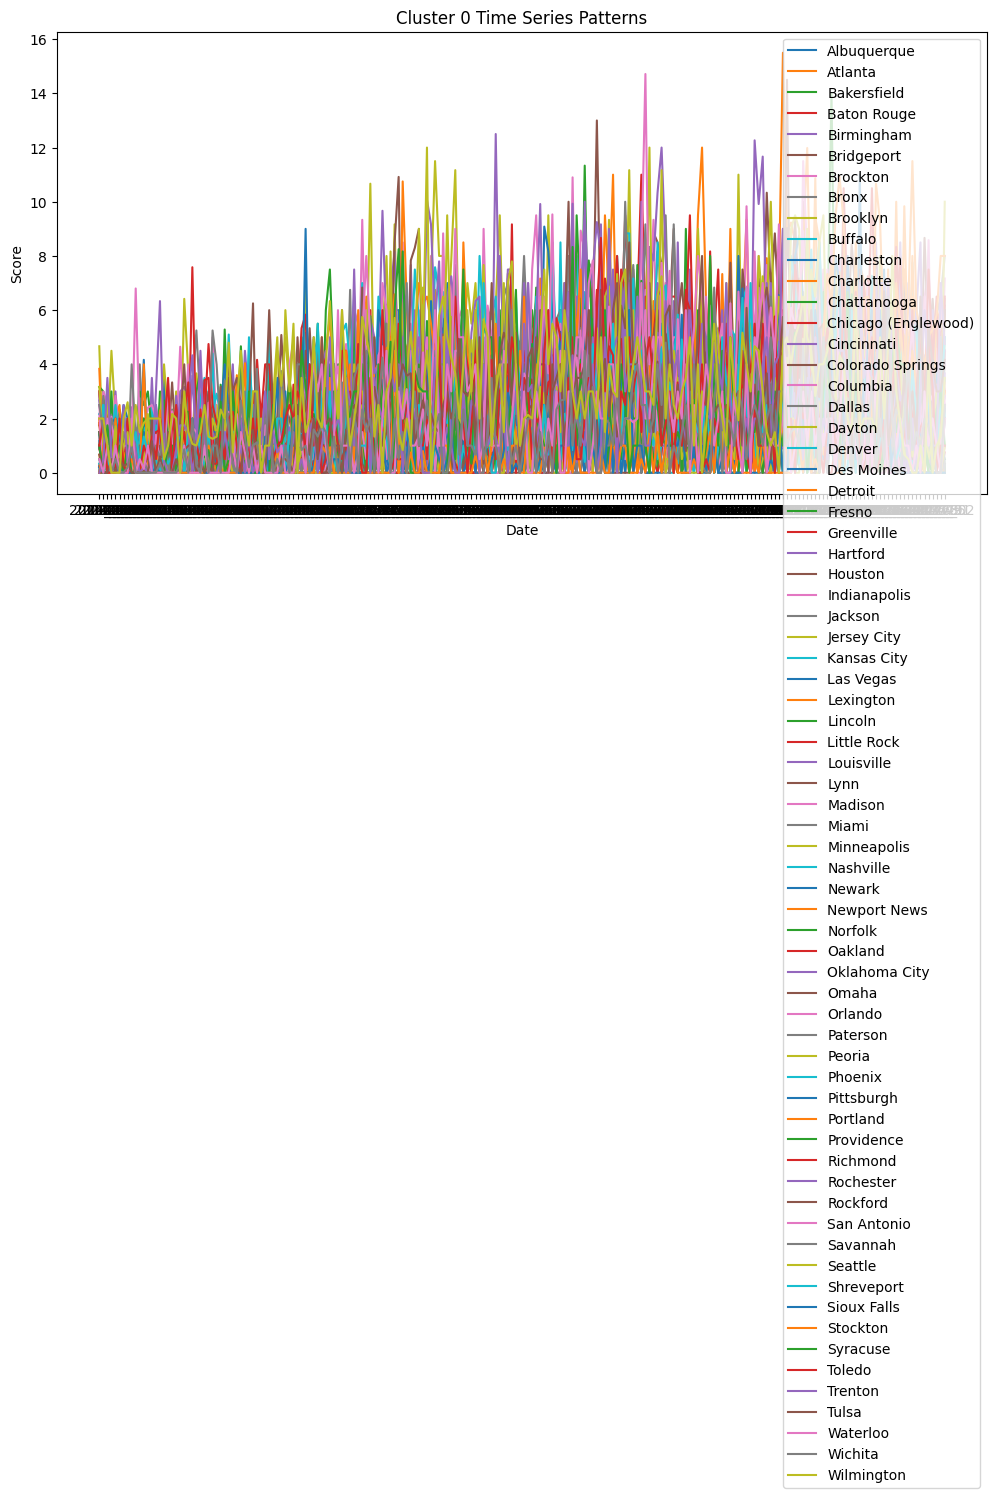

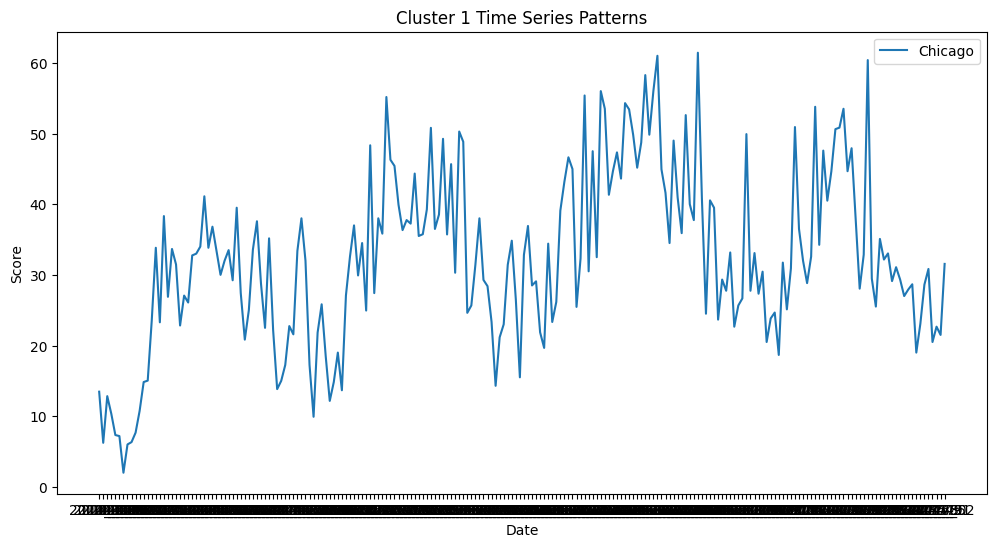

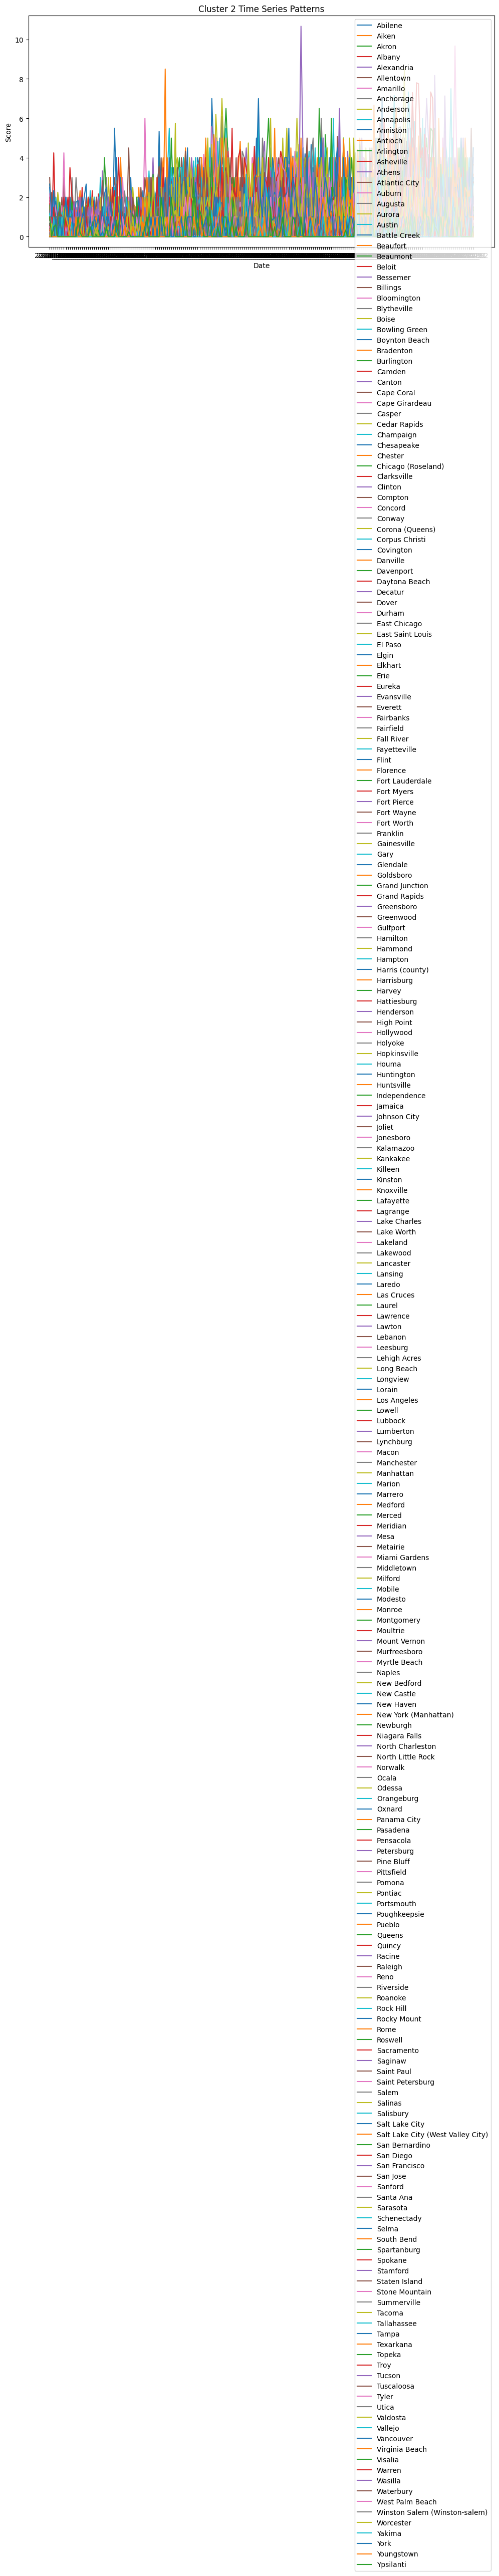

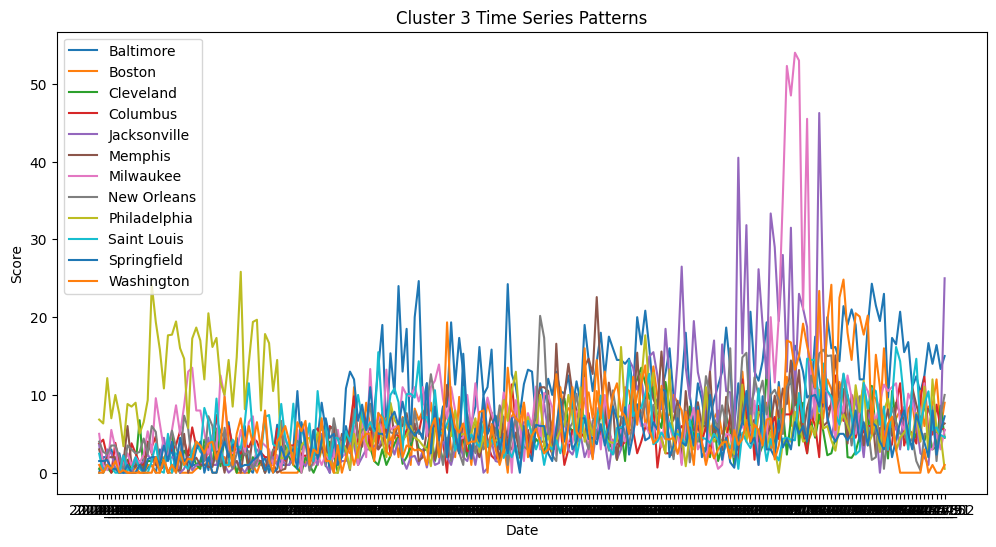

In [ ]:
def visualize_cluster_time_series(cluster_labels, time_series_data):
    for cluster_label in np.unique(cluster_labels):
        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        cluster_data = time_series_data.iloc[cluster_indices]

        plt.figure(figsize=(12, 6))
        plt.title(f"Cluster {cluster_label} Time Series Patterns")
        for index, row in cluster_data.iterrows():
            plt.plot(row.index, row.values, label=str(index))
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('Score')
        plt.show()

# Visualize time series patterns for each cluster
visualize_cluster_time_series(clusters_cities, ts_score2)

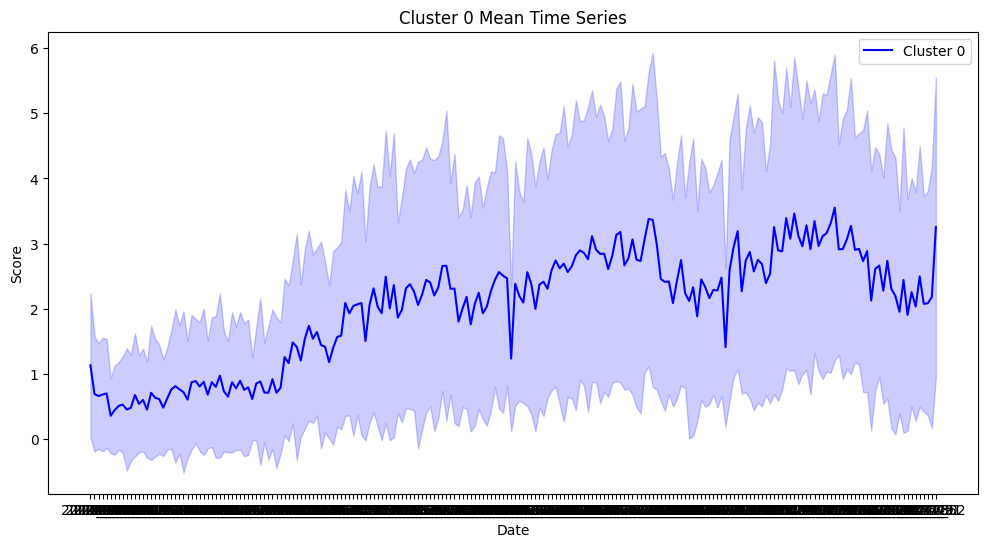

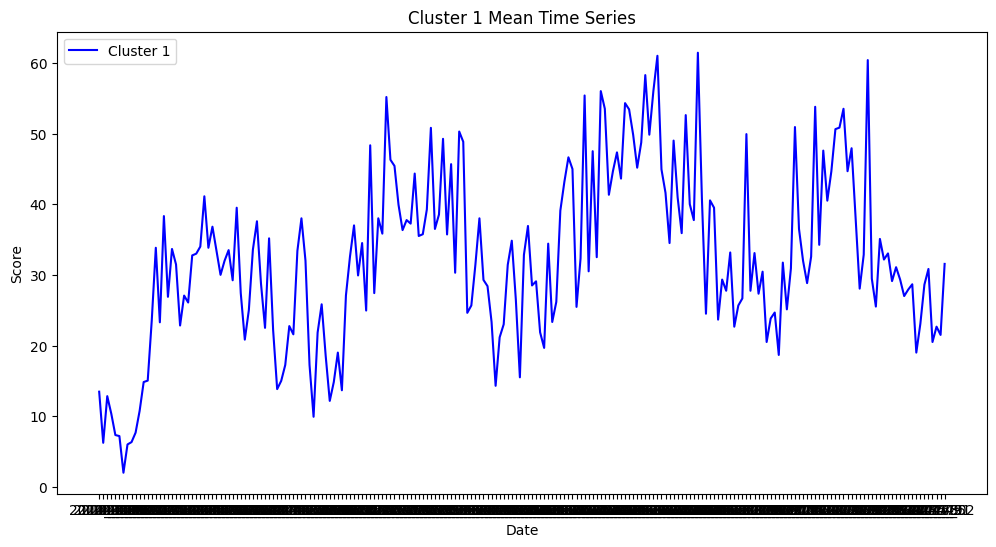

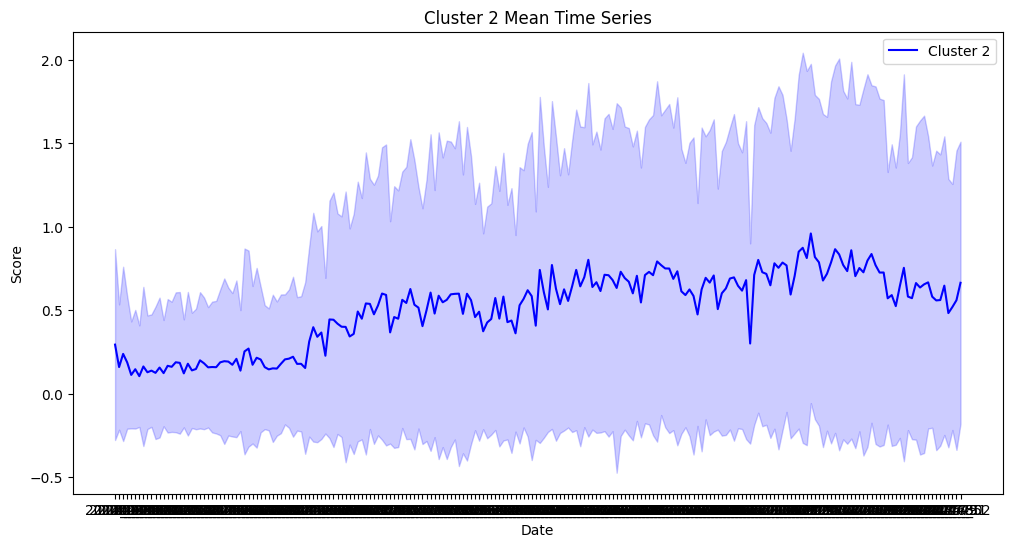

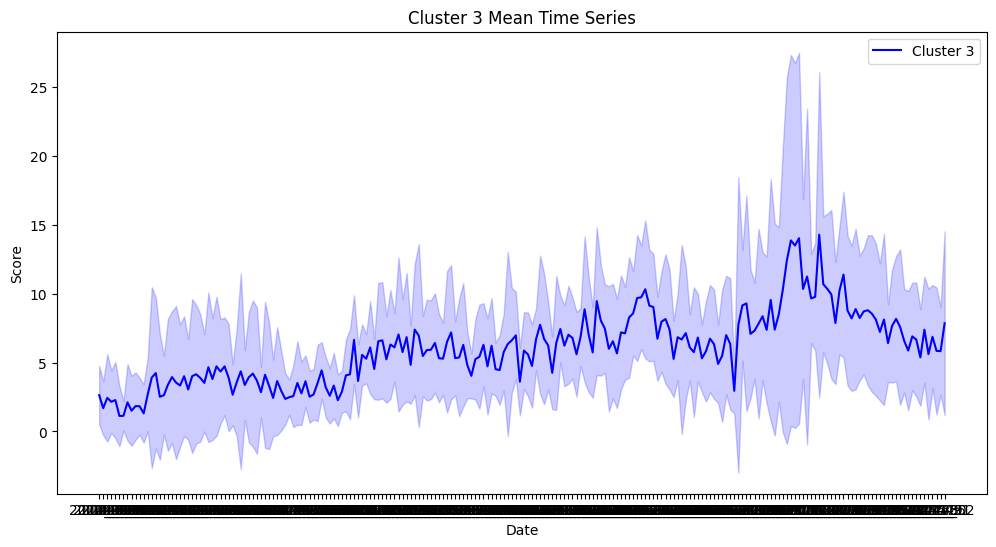

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_time_series(cluster_labels, time_series_data):
    unique_clusters = np.unique(cluster_labels)

    for cluster_label in unique_clusters:
        cluster_indices = np.where(cluster_labels == cluster_label)[0]
        cluster_data = time_series_data.iloc[cluster_indices]

        # Calculate the mean time series for the cluster
        mean_series = cluster_data.mean(axis=0)

        plt.figure(figsize=(12, 6))
        plt.title(f"Cluster {cluster_label} Mean Time Series")
        plt.plot(mean_series.index, mean_series.values, label=f'Cluster {cluster_label}', color='blue')
        plt.fill_between(mean_series.index,
                         mean_series.values - cluster_data.std(axis=0).values,
                         mean_series.values + cluster_data.std(axis=0).values,
                         color='blue', alpha=0.2)

        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('Score')
        plt.show()

# Visualize mean time series for each cluster
visualize_cluster_time_series(clusters_cities, ts_score2)

# TASK 4.1.1 MOTIFS/ANOMALIES EXTRACTION

Motif: a repeated pattern in the time series. We can discover motif by computing the Matrix Profile: a data structure that annotates time series by using a sliding window to compare the pairwise distance among the subsequences.

In [ ]:
df_final['is_killed'] = df_final['n_killed'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
df_final.head(10)

year  month  day    state city_or_county  congressional_district  \
0  2013     12   28  ALABAMA     Montgomery                       2   
1  2013      7    6  ALABAMA       Florence                       5   
2  2014      6   28  ALABAMA         Auburn                       3   
3  2014      7   29  ALABAMA         Ensley                       7   
4  2014      5   28  ALABAMA     Huntsville                       5   
5  2014      7   20  ALABAMA          Salem                       3   
6  2014      5   13  ALABAMA     Montgomery                       7   
7  2014      9   16  ALABAMA        Elkmont                       5   
8  2014      4    9  ALABAMA        Decatur                       5   
9  2014      5   19  ALABAMA         Mobile                       1   

   min_age_participants  avg_age_participants  max_age_participants  \
0                    20                    22                    25   
1                    22                    22                    22   
2                    36                    36                    36   
3                    26                    26                    26   
4                    24                    27                    29   
5                    48                    64                    80   
6                    43                    43                    43   
7                    32                    36                    41   
8                    22                    22                    22   
9                    24                    27                    29   

   n_participants_child  n_participants_teen  n_participants_adult  n_males  \
0                     0                    0                     9        8   
1                     0                    0                     1        0   
2                     0                    0                     2        2   
3                     0                    0                     5        3   
4                     0                    0                     2        2   
5                     0                    0                     2        1   
6                     0                    0                     1        1   
7                     0                    0                     4        3   
8                     0                    0                     1        1   
9                     0                    0                     2        4   

   n_females  n_killed  n_injured  n_arrested  n_unharmed  n_participants  \
0          1         3          5           2           0              10   
1          1         0          4           1           0               5   
2          0         0          1           0           1               2   
3          2         1          2           0           0               5   
4          0         0          0           0           1               2   
5          1         0          1           1           0               2   
6          0         1          0           0           0               1   
7          1         0          0           0           4               4   
8          0         0          1           0           0               1   
9          0         0          0           0           1               4   

                   incident_characteristics1  \
0                     Shot - Wounded/Injured   
1                     Shot - Wounded/Injured   
2                     Shot - Wounded/Injured   
3                     Shot - Wounded/Injured   
4                                 TSA Action   
5                     Shot - Wounded/Injured   
6  Shot - Dead (murder, accidental, suicide)   
7                              Home Invasion   
8                     Shot - Wounded/Injured   
9                     Shot - Wounded/Injured   

                           incident_characteristics2  povertyPercentage  \
0          Shot - Dead (murder, accidental, suicide)               17.5   
1  Mass Shooting (4+ victims injured or ki

In [ ]:
time_series.head()

city_or_county  Aberdeen  Abilene  Aiken  Akron  Albany  Albert Lea  \
date                                                                  
2014-01-05          -1.0     -1.0  -1.00  -1.00    1.00        -1.0   
2014-01-12          -1.0     -1.0   0.25  -1.00   -1.00        -1.0   
2014-01-19           0.0     -1.0  -1.00  -1.00    4.25        -1.0   
2014-01-26          -1.0      0.5  -1.00   1.25   -1.00        -1.0   
2014-02-02          -1.0     -1.0  -1.00  -1.00    0.00        -1.0   

city_or_county  Albuquerque  Alexandria  Allentown  Alton  Alvin  Amarillo  \
date                                                                         
2014-01-05              1.0        -1.0        0.0   -1.0   -1.0  0.000000   
2014-01-12             -1.0         0.0       -1.0   -1.0   -1.0  0.000000   
2014-01-19             -1.0         0.0        1.0    0.2   -1.0 -1.000000   
2014-01-26              1.5        -1.0        0.5    0.0   -1.0  0.333333   
2014-02-02              0.0        -1.0        0.5   -1.0   -1.0 -1.000000   

city_or_county  Anaheim  Anchorage  Anderson  Ann Arbor  Annapolis  Anniston  \
date                                                                           
2014-01-05         -1.0        0.5      -1.0       -1.0  -1.000000      -1.0   
2014-01-12         -1.0        0.5      -1.0       -1.0  -1.000000       1.0   
2014-01-19         -1.0        1.0      -1.0       -1.0  -1.000000      -1.0   
2014-01-26         -1.0        2.0      -1.0       -1.0   0.833333      -1.0   
2014-02-02         -1.0       -1.0      -1.0       -1.0   0.000000      -1.0   

city_or_county  Antioch  Apopka  Arlington  Asheville  Athens  Atlanta  \
date                                                                     
2014-01-05         -1.0    -1.0       -1.0        0.0    -1.0     0.00   
2014-01-12         -1.0    -1.0        0.0       -1.0     0.0     1.00   
2014-01-19         -1.0    -1.0        1.5        1.0    -1.0     0.50   
2014-01-26          0.5    -1.0        0.0        0.0     1.0     1.25   
2014-02-02         -1.0    -1.0       -1.0        0.0     0.5     0.50   

city_or_county  Atlanta (College Park)  Atlantic City  Atwater  Auburn  \
date                                                                     
2014-01-05                         1.0       1.833333     -1.0     0.0   
2014-01-12                        -1.0       1.000000     -1.0    -1.0   
2014-01-19                        -1.0       1.333333     -1.0     0.0   
2014-01-26                        -1.0       2.000000     -1.0    -1.0   
2014-02-02                        -1.0       1.000000     -1.0    -1.0   

city_or_county   Augusta    Aurora    Austin  Bakersfield  Baltimore  \
date                                                                   
2014-01-05     -1.000000 -1.000000  1.000000          2.0   1.666667   
2014-01-12     -1.000000  0.000000  0.000000          1.0   7.000000   
2014-01-19      0.000000  1.333333  0.333333          1.0   3.000000   
2014-01-26      0.666667 -1.000000  0.000000          0.0   4.000000   
2014-02-02     -1.000000 -1.000000  1.000000         -1.0   3.533333   

city_or_county  Baton Rouge  Battle Creek  Bay City  Beaufort  Beaumont  \
date                                                                      
2014-01-05         0.928571          -1.0      -1.0       0.5      -1.0   
2014-01-12         0.000000          -1.0      -1.0      -1.0      -1.0   
2014-01-19         0.500000          -1.0       0.0       0.5      -1.0   
2014-01-26         1.181818          -1.0      -1.0       0.5       1.0   
2014-02-02         1.500000          -1.0      -1.0      -1.0      -1.0   

city_or_county  Beckley  Belle Glade  Belleville  Bellingham  Beloit  Bemidji  \
date                                                                            
2014-01-05         -1.0         -1.0         0.0   -1.000000    -1.0     -1.0   
2014-01-12         -1.0         -1.0        -1.0   -1.000000    -1.0     -1.0   
2

We decided to present the results of the city with the highest amount of incidents (Chicago)

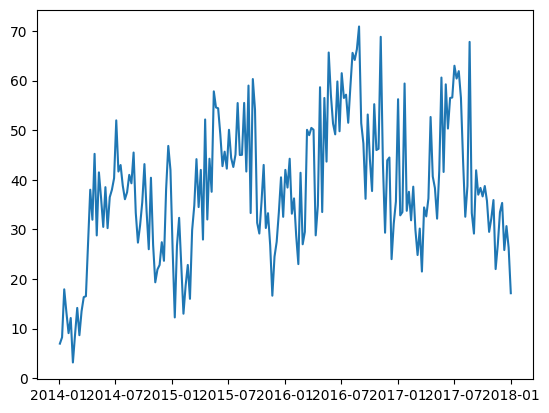

In [ ]:
ts = time_series['Chicago']
plt.plot(ts)
plt.show()

In [ ]:
pip install matrixprofile-ts

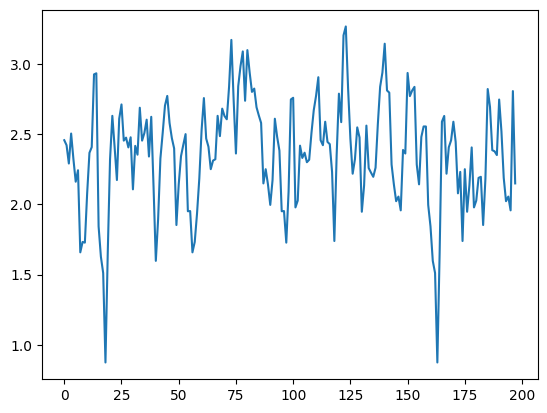

In [ ]:
from matrixprofile import *

w = 12
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

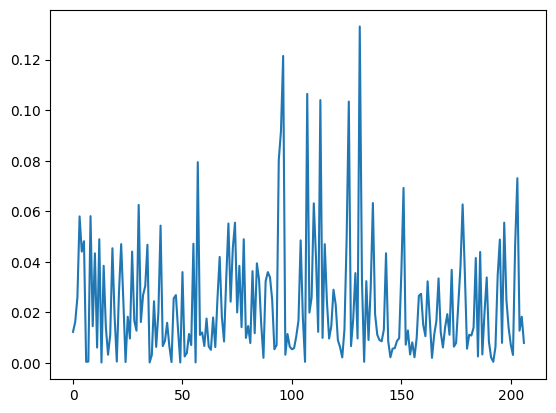

In [ ]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.plot(mp)
plt.show()

In [ ]:
mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)

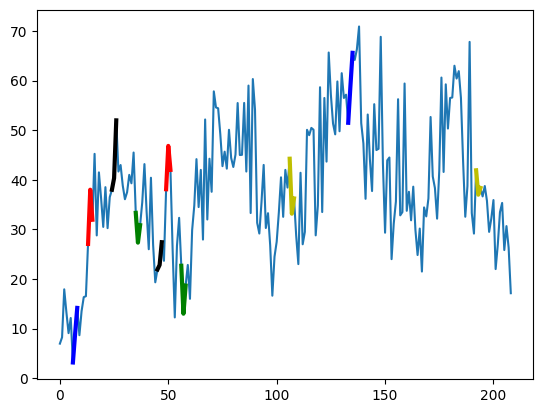

In [ ]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

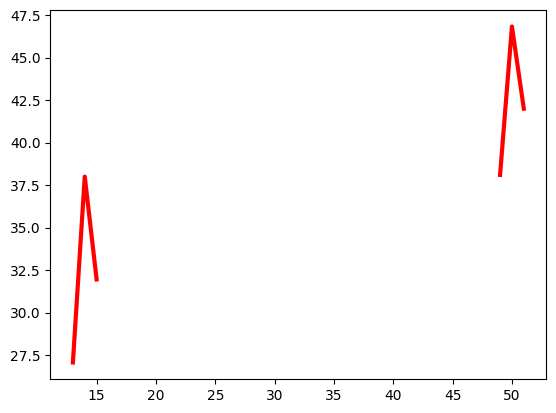

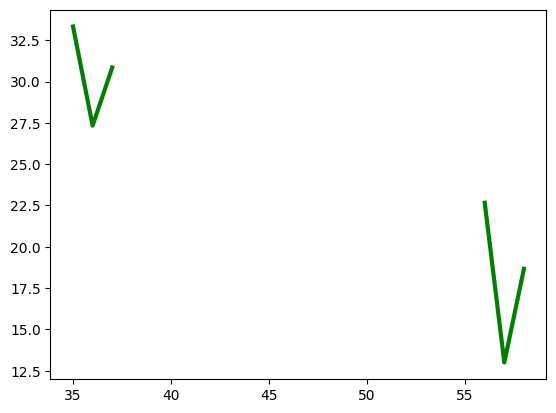

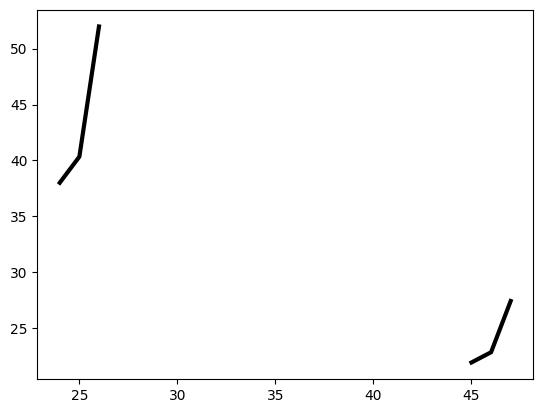

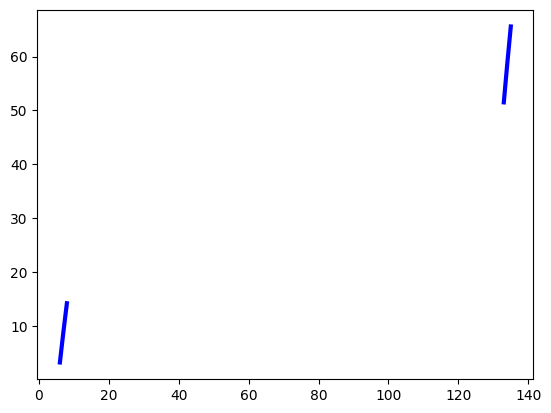

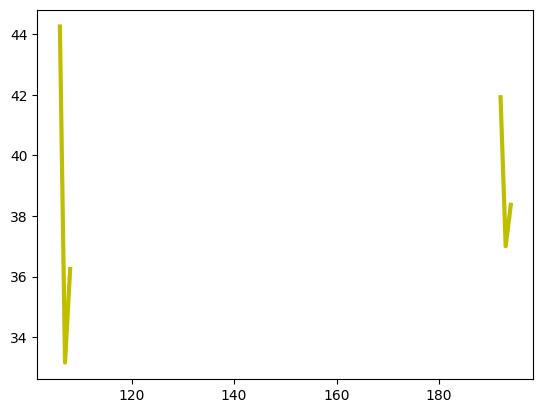

In [ ]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

**ANOMALIES DETECTION**

In [ ]:
from matrixprofile.discords import discords
anoms = discords(mp, ex_zone=3, k=5)

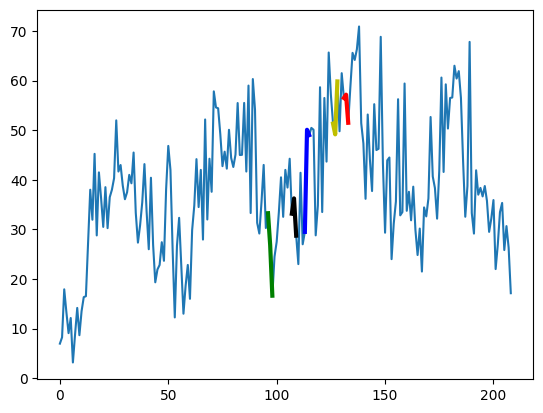

In [ ]:
plt.plot(ts.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

# TASK 4.1.2 SHAPELET EXTRACTION

In [ ]:
df_final['is_killed'] = df_final['n_killed'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
selected_years = [2014, 2015, 2016, 2017]
filtered_df = df_final[df_final['year'].isin(selected_years)]

# Assuming df_final is your original DataFrame
filtered_df['date'] = pd.to_datetime(filtered_df['date'])
filtered_df['week'] = filtered_df['date'].dt.week

# Calculate the score for each incident
filtered_df['score'] = (filtered_df['n_injured'] + filtered_df['n_arrested']) / filtered_df['n_participants']

# Group by year, city_or_county, and week, then calculate the sum of the scores
grouped_df = filtered_df.groupby(['year', 'city_or_county', 'week']).agg({'score': 'sum','is_killed': 'max'}).reset_index()

# Pivot the table to have cities as rows and weeks as columns
pivot_df = grouped_df.pivot_table(index='city_or_county', columns=['year', 'week'], values='score', fill_value=0)

threshold = 0.15 * len(pivot_df.columns)

time_series = pivot_df[pivot_df.apply(lambda row: (row > 0).sum() > threshold, axis=1)]

#X = time_series['score']

#time_series['is_killed'] = time_series['is_killed'].replace(-1, 0)

#y = time_series['is_killed']


<ipython-input-297-4a22298cedc1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])
<ipython-input-297-4a22298cedc1>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  filtered_df['week'] = filtered_df['date'].dt.week
<ipython-input-297-4a22298cedc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['week'] = filtered_df['date'].dt.week
<ipython-input-297-4a22298

In [ ]:
time_series.head(100)

is_killed                                                  \
year                     2014                                                   
week                       1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17   
city_or_county                                                                  
Abilene                     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Aiken                       0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   
Akron                       0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0   
Albany                      0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
Albuquerque                 0  0  0  1  0  0  0  1  0  0  1  1  0  0  0  0  1   
Alexandria                  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0   
Allentown                   0  0  1  0  0  0  0  0  0  1  0  0  0  0  1  0  0   
Amarillo                    0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0   
Anchorage                   0  1  1  1  0  0  0  0  0  0  0  0  0  1  0  0  0   
Anderson                    0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0   
Annapolis                   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0   
Anniston                    0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Antioch                     0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0   
Arlington                   0  0  1  0  0  0  0  0  1  1  0  1  0  0  0  1  0   
Asheville                   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Athens                      0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0   
Atlanta                     0  1  0  1  1  0  0  0  0  1  1  1  1  0  0  1  1   
Atlantic City               0  1  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0   
Auburn                      0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
Augusta                     0  0  0  1  0  1  0  0  0  1  0  0  0  1  1  0  0   
Aurora                      0  0  1  0  0  0  0  1  0  0  0  1  0  0  0  0  0   
Austin                      1  0  1  0  1  0  0  1  1  0  0  0  0  0  0  0  0   
Bakersfield                 1  0  0  0  0  0  0  0  1  0  0  0  1  1  1  0  0   
Baltimore                   1  1  1  1  1  0  0  1  1  1  0  0  1  1  1  1  1   
Baton Rouge                 0  0  1  0  1  1  1  0  0  0  0  1  1  1  1  1  0   
Battle Creek                0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Beaufort                    0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0   
Beaumont                    0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0   
Beloit                      0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1   
Bessemer                    0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1   
Billings                    0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0   
Birmingham                  1  0  0  1  0  1  0  0  1  1  0  1  0  1  0  0  1   
Bloomington                 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
Blytheville                 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0   
Boise                       0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Boston                      0  1  0  1  0  1  0  0  0  0  0  0  0  1  0  0  0   
Bowling Green               0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Boynton Beach               0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0   
Bradenton                   0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0   
Bridgeport                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0   
Brockton                    0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0   
Bronx                       1  1  1  1  1  1  0  0  0  1  1  1  0  1  0  1  0   
Brooklyn                    1  0  1  0  1  1  0  0  1  0  1  1  1  1  1  1  1   
Buffalo                     1  0  0  0  0  0  0  1  0  0  0  0  1  0  0  1  0   
Burlington                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Camden                      1  0  0  0  0  1  1  1 

In [ ]:
print(X.shape)
print(y.shape)

(325, 210)
(325, 210)


In [ ]:
y.head(10)

year           2014                                                           \
week             1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20   
city_or_county                                                                 
Abilene           0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Aiken             0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
Akron             0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Albany            0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  1   
Albuquerque       0  0  0  1  0  0  0  1  0  0  1  1  0  0  0  0  1  0  0  0   
Alexandria        0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0   
Allentown         0  0  1  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0   
Amarillo          0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0   
Anchorage         0  1  1  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0   
Anderson          0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0   

year                                                                           \
week           21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41   
city_or_county                                                                  
Abilene         0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Aiken           0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Akron           1  0  1  1  1  0  0  1  1  0  0  0  0  1  0  0  1  0  0  0  0   
Albany          0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0   
Albuquerque     1  1  0  0  0  0  0  0  1  1  0  1  1  0  1  0  0  0  1  0  0   
Alexandria      0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0   
Allentown       0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0   
Amarillo        1  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
Anchorage       0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0   
Anderson        0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   

year                                            2015                          \
week           42 43 44 45 46 47 48 49 50 51 52   1  2  3  4  5  6  7  8  9    
city_or_county                                                                 
Abilene         0  0  0  0  0  0  0  0  0  0  1    0  0  0  0  0  0  0  0  0   
Aiken           0  0  0  0  0  1  0  0  0  0  0    0  0  0  0  0  0  0  0  0   
Akron           0  0  0  1  1  0  0  0  0  0  0    0  1  0  0  0  0  1  0  0   
Albany          1  0  0  0  0  0  0  0  0  0  0    0  0  0  0  0  1  0  0  0   
Albuquerque     1  1  1  0  0  1  1  0  0  1  1    0  1  1  0  1  1  1  1  1   
Alexandria      0  0  0  1  0  0  0  0  0  0  1    1  0  0  0  0  0  0  0  0   
Allentown       0  0  0  0  0  0  0  0  0  0  1    0  0  0  0  0  0  0  0  1   
Amarillo        0  0  0  0  0  1  0  0  0  0  0    0  0  1  0  0  0  0  0  0   
Anchorage       0  0  0  0  0  0  0  0  0  0  0    0  0  0  1  1  1  1  0  0   
Anderson        0  0  1  0  1  0  1  1  0  0  1    0  0  0  0  0  1  1  1  0   

year                                                                           \
week           10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30   
city_or_county                                                                  
Abilene         0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  1  0  0  1   
Aiken           0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0   
Akron           0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  1  0   
Albany          1  0  0  0  0  0  0  0  1  1  0  1  0  1  0  0  0  1  0  0  0   
Albuquerque     0  0  1  1  0  0  0  0  1  1  1  0  1  1  0  1  1  1  1  0  0   
Alexandria      0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0   
Allentown       0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0   
Amarillo        0  0  1  0  0  0  0  0  0  0  0  0  0 

In [ ]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.7 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [ ]:
n_ts, ts_sz = X.shape
n_classes = len(set(y))


shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 325
ts_sz 210
n_classes 210
shapelet_sizes {21: 7}


In [ ]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/usr/local/lib/python3.10/dist-packages/tslearn/shapelets/shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


In [ ]:
shp_clf.fit(X, y)

ValueError: y should be a 1d array, got an array of shape (325, 210) instead.